Loading the Reuters dataset

In [2]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2022-04-23 19:54:59.345466: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-23 19:54:59.345544: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2121728/2110848 [==============================] - 0s 0us/step


Checking the dimension of data

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

Each example is list of integers(word indices)

In [8]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [12]:
len(train_data[0])

87

Encoding the input data (x)

In [16]:
import numpy as np

def vectorized_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
            
    return results

x_train = vectorized_sequences(train_data)
x_test = vectorized_sequences(test_data)

Encoding the labels

In [17]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1. 
    return results

y_train = to_one_hot(train_labels)   
y_test = to_one_hot(test_labels)

In [22]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Or we can use builtin method available in keras

In [25]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [23]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Building the model

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
            loss="categorical_crossentropy",
            metrics=["accuracy"])

Preparing validation set of 1000 samples from the training data

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Train the model for 20 epochs

In [32]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 2.6399 - accuracy: 0.5564 - val_loss: 1.7877 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.4384 - accuracy: 0.7061 - val_loss: 1.3113 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0512 - accuracy: 0.7755 - val_loss: 1.1326 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8298 - accuracy: 0.8182 - val_loss: 1.0493 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6675 - accuracy: 0.8582 - val_loss: 0.9772 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5384 - accuracy: 0.8867 - val_loss: 0.9238 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.4327 - accuracy: 0.9117 - val_loss: 0.9070 - val_accuracy: 0.8070
Epoch 8/20
16

Plotting the training and validation loss

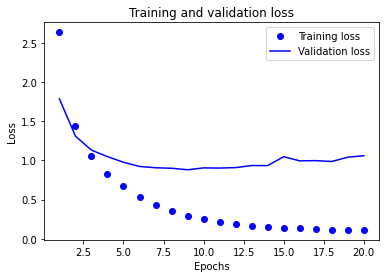

In [34]:
import matplotlib.pyplot as plt 

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the traning and validation accuracy

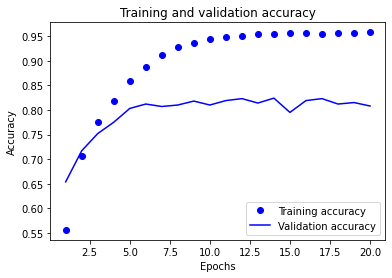

In [36]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model began to overfit at 6 epoch so retraining a moded from scratch for 6 epochs

In [39]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

Training model.

In [40]:
model.fit(x_train,
            y_train,
            epochs=6,
            batch_size=512)

Epoch 1/6
18/18 [==============================] - 1s 15ms/step - loss: 2.6283 - accuracy: 0.5026
Epoch 2/6
18/18 [==============================] - 0s 16ms/step - loss: 1.3806 - accuracy: 0.7164
Epoch 3/6
18/18 [==============================] - 0s 15ms/step - loss: 1.0187 - accuracy: 0.7876
Epoch 4/6
18/18 [==============================] - 0s 16ms/step - loss: 0.7985 - accuracy: 0.8280
Epoch 5/6
18/18 [==============================] - 0s 16ms/step - loss: 0.6297 - accuracy: 0.8685
Epoch 6/6
71/71 [==============================] - 0s 2ms/step - loss: 0.9651 - accuracy: 0.7903


Model evaluation

In [43]:
results = model.evaluate(x_test, y_test)
print("test loss:", results[0])
print("test accuracy:", results[1])

71/71 [==============================] - 0s 2ms/step - loss: 0.9651 - accuracy: 0.7903
test loss: 0.9651060700416565
test accuracy: 0.7902938723564148
